<center> 
    <div style="font-size: 40px;">
        <strong>
            <U>Projet IA HumanForYou </U>
        </strong>
    </div>
</center>

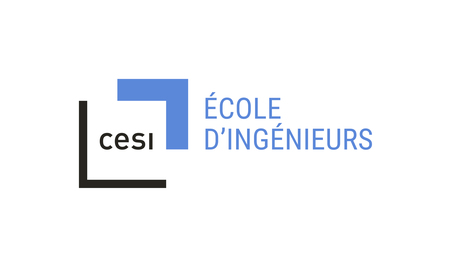


<center> 
    GIRARD-TISSIER Ugo
     | 
    GISLARD Enzo
     | 
    GUESMIA Abdelrahmane
     | 
    CASENOVE Antoine
</center>

In [1]:
#import généraux
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

seed = 42

# 1. Introduction

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

* Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

* Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

* Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction nous fait donc appel pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

# 2. Préparation des données

### A. Chargement des jeux de données

Les données fournies par HumanForYou ont, dans un premier temps, été téléchargées et placées dans le répertoire `datasets`.

Nous allons maintenant créer une fonction utilisant [`Pandas`](https://pandas.pydata.org/) qui s'occupe de charger les données en mémoire dans un `Pandas DataFrame`.

In [2]:
import os

def load_datasets(path, file_name):
    csv_path = os.path.join(path, file_name)
    return pd.read_csv(csv_path)

Il est maintenant possible de charger nos données pour chaque fichier CSV transmis par HumanForYou

In [3]:
general_data = load_datasets("datasets", "general_data.csv")
manager_survey_data = load_datasets("datasets", "manager_survey_data.csv")
employee_survey_data = load_datasets("datasets", "employee_survey_data.csv")
in_time_data = load_datasets("datasets", "in_time.csv")
out_time_data = load_datasets("datasets", "out_time.csv")

Nous allons afficher les premières lignes de nos diffèrents tableaux `Pandas` pour en faire une première approche

In [4]:
general_data.head(2).style

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.000000,Y,11,8,0,1.000000,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.000000,Y,23,8,1,6.000000,3,5,1,4


In [5]:
manager_survey_data.head(2).style

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [6]:
employee_survey_data.head(2).style

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.000000,4.000000,2.000000
1,2,3.000000,2.000000,4.000000


In [7]:
in_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,nan,2015-01-15 10:01:24,2015-01-16 10:19:08,nan,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,nan,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,nan,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,nan,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,nan,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,nan,2015-03-27 09:47:30,2

In [8]:
out_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,nan,2015-01-15 17:22:13,2015-01-16 17:35:11,nan,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,nan,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,nan,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,nan,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,nan,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,nan,2015-03-27 17:20:51,2

### B. Construction d'un unique dataset

Pour éviter de se compliquer la tache, il est preferable de travailler avec un seul et unique dataset. Or l'entreprise nous a transmis des jeux de données qui sont liés à leurs employés. Nous allons donc essayer de "joindre" ces jeux de données en un seul tableau.

Nous vérifions dans un premier si nos tableaux `Pandas` contiennent le même nombre de ligne

In [9]:
print("Dimensions general_data :", general_data.shape)
print("Dimensions manager_survey_data :", manager_survey_data.shape)
print("Dimensions employee_survey_data :", employee_survey_data.shape)
print("Dimensions in_time_data :", in_time_data.shape)
print("Dimensions out_time_data :", out_time_data.shape)

Dimensions general_data : (4410, 24)
Dimensions manager_survey_data : (4410, 3)
Dimensions employee_survey_data : (4410, 4)
Dimensions in_time_data : (4410, 262)
Dimensions out_time_data : (4410, 262)


Bonne nouvelle! Les tableaux contiennent tous le même nombre de ligne. Il semblerait que nous ayons donc une ligne par employé dans chaque tableau. 

Nous pouvons commencer par essayer de "joindre" les tableaux `general_data` et `manager_survey_data`. En effet, ces deux tableaux ont une colonne similaire nommée `EmployeeID` qui semble la plus adaptée à une jointure. 

Avant de faire la jointure, nous allons vérifier qu'il n'y a pas de doublons sur cette donnée car cela pourrait planter notre jointure.

In [10]:
print("Nombre de ligne unique general_data : ", general_data.EmployeeID.unique().shape)
print("Nombre de ligne unique manager_survey_data : ", manager_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique general_data :  (4410,)
Nombre de ligne unique manager_survey_data :  (4410,)


Parfait, le nombre d'élément unique est le même, nous pouvons faire la jointure sur cette colonne

In [11]:
dataset = general_data.join(manager_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 26)


Nous obtenons bien le même nombre de ligne et nous avons bien les 24 colonnes de `general_data` plus les 2 colonnes de `manager_survey_data` (`EmployeeID` n'ayant été gardée qu'une seule fois lors de la jointure) 

Nous pouvons maintenant réexécuter cette procédure avec les tableaux `dataset` et `employee_survey_data`

In [12]:
print("Nombre de ligne unique employee_survey_data : ", employee_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique employee_survey_data :  (4410,)


In [13]:
dataset = dataset.join(employee_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 29)


Les tableaux `in_time_data` et `out_time_data` ne contiennent pas de colonne nommée `EmployeeID`. Cependant la première colonne de ces deux tableaux y ressemble beaucoup. Nous allons vérifier si celle-ci contient des données uniques, si oui alors nous utiliserons cette colonne en tant qu'ID de jointutre.

In [14]:
in_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
out_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
print("Nombre de ligne unique in_time_data : ", in_time_data.EmployeeID.unique().shape)
print("Nombre de ligne unique out_time_data : ", out_time_data.EmployeeID.unique().shape)

Nombre de ligne unique in_time_data :  (4410,)
Nombre de ligne unique out_time_data :  (4410,)


In [15]:
dataset = dataset.join(in_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
dataset = dataset.join(out_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID", lsuffix='_in', rsuffix='_out')

In [16]:
dataset.head().style

Notre variable `dataset` est maintenant le résultat de la jointure de tout les tableaux fournit par HumanForYou, ce qui sera beaucoup plus simple à exploiter pour plus tard.

### C. Exploration du jeu de données

Nous allons, dans cette partie, étudier plus en détails les données qui nous ont été fournies par l'entreprise. Dans un premier temps nous allons nous focaliser sur les données 28 premières colonnes et ainsi éliminer toutes les colonnes liées aux entrées / sorties des employés pour "allèger" notre dataset.

In [17]:
dataset_without_in_out = dataset.drop(dataset.iloc[:,29:],1)
dataset_without_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### C.1 Question d'éthique

La première question à traiter avant tout travail sur un dataset est bien évidemment la question de `l'éthique`. En effet, nous ne pouvons pas nous permettre de travailler sur des données pouvant amener à des conflits basés sur l'éthique.

Ainsi, bien que certaines de ces données peuvent peut être jouer un rôle important dans notre étude, nous décidons de supprimer les colonnes suivantes pour éviter tout problème :

* Gender
* MaritalStatus            

In [18]:
dataset_without_in_out.drop("Gender", axis=1, inplace=True)
dataset_without_in_out.drop("MaritalStatus", axis=1, inplace=True)

#### C.2 Recherche des données inutiles

Nous allons commencer par afficher un `histogramme` par attribut numérique.

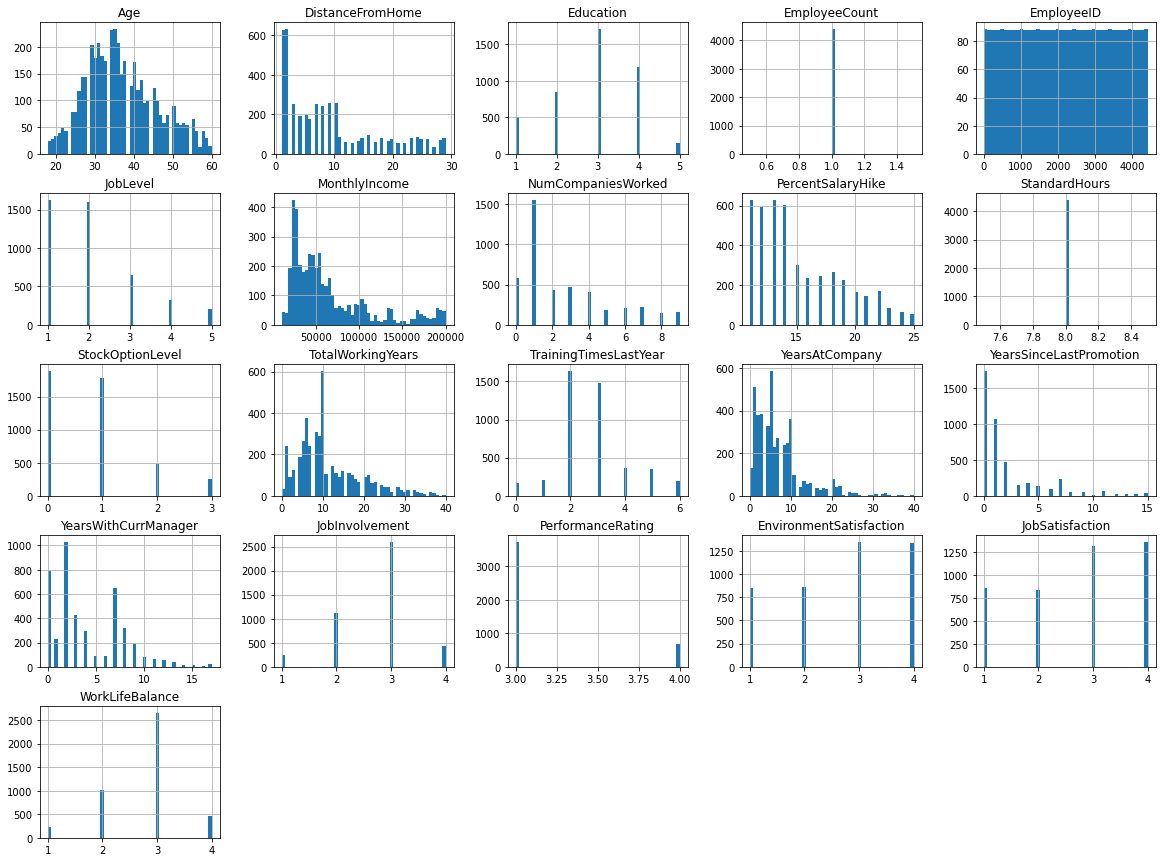

In [19]:
dataset_without_in_out.hist(bins=50, figsize=(20,15))
plt.show()

#### Remarques :

* `EmployeeID` n'a pas d'intéret dans notre jeu de données. Cette colonne est un simple identifiant, un algorithme de machine learning n'en tirera rien.


* On peut voir ici que `EmployeeCount` ne semble pas être une donnée pertinente. En effet l'ensemble des employées était présent en 2015, cela n'aura donc aucun impact sur la prédiction que l'on souhaite faire. Si l'ensemble des employées est "regroupé" sous une même valeurs, cela signifie que cette données est inutile pour notre modèle.


* Il en est de même pour la donnée `StandardHours`. Celle-ci ne semble avoir aucune pertinence puisque l'ensemble des employés ont tous le même nombre d'heures à effectuer au sein d'une journée.


* `PerformanceRating` possède deux "classes" bien distinctes. En effet l'ensemble des données sont regroupées sous deux valeurs : 3 et 4, il serait peut être intéressant de savoir si cette données à un impact direct sur l'attrition.


* Les colonnes `WorkLifeBalance` et `JobInvolvement` ont quasiment les mêmes historgrammes. Il en est de même pour `JobSatisfaction` et `EnvironmentSatisfaction`. Nous allons donc verifier si il existe des corrélations entre ces colonnes.


* Certaines données comme `YearSinceLastPromotion` & `DistanceFromHome` semblent intéressantes à étudier. En effet, on peut voir que beaucoup de personnes qui habitent loin de leur lieu de travail et beaucoup ont été promus récemment, ces données ont potentiellement un impact sur le turn over au sein de la société.


* La colonne `Age` semble ne pas descendre en dessous de 18 ans. Nous allons vérifier cela avec la colonne `Over18` qui est quand à elle une donnée qualitative. Si c'est le cas, alors nous pourrons supprimer la colonne `Over18` car elle ne servirait à rien pour notre modèle.


* Les échelles sont très différentes d'une feature à l'autre. Un scaling sera nécessaire pour obtenir un modèle performant.

Nous pouvons donc supprimer les colonnes `EmployeeID`, `EmployeeCount` et `StandardHours` car elles n'ont pas d'intérêt :

In [20]:
dataset_without_in_out.drop("EmployeeID", axis=1, inplace=True) 
dataset_without_in_out.drop("EmployeeCount", axis=1, inplace=True) 
dataset_without_in_out.drop("StandardHours", axis=1, inplace=True) 

Vérifions maintenant la colonne `Over18` :

In [21]:
dataset_without_in_out["Over18"].value_counts()

Y    4410
Name: Over18, dtype: int64

Nous avons vu juste, les 4410 valeurs sont toutes les mêmes dans cette colonne. Nous pouvons la supprimer.

In [22]:
dataset_without_in_out.drop("Over18", axis=1, inplace=True) 

In [23]:
dataset_without_in_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

#### C.3 Étude des horaires d'entrées / sorties

Les données d'entrées / sorties fournies par les badgeuses de l'entreprise sont assez indigestes et n'ont pas de valeur significative pour un algorithme de machine learning dans leur forme actuelle. Nous avons donc décidé d'essayer de faire une moyenne du nombre d'heure travaillées, par jour, d'un employé entre le `01/01/2015` et le `31/12/2015`

Nous commencons par récuperer un tableau contenant uniquement les données d'entrées / sorties depuis notre `dataset`

In [24]:
dataset_with_in_out = dataset.drop(dataset.iloc[:, 0:29],1)

Nous allons maintenant transformer toutes ces données étant de type `string` en `datetime`

In [25]:
dataset_with_in_out = dataset_with_in_out.apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

Il est maintenant nécessaire de "soustraire" les sorties des entrées des employés pour obtenir le temps qu'ils ont passés, par jour, sur leur lieu de travail

In [26]:
import datetime as dt
import pandas as pd

nombre_de_jour = int(dataset_with_in_out.shape[1] / 2)

datetime_in = dataset_with_in_out.drop(dataset_with_in_out.iloc[:, nombre_de_jour:],1)
datetime_out = dataset_with_in_out.drop(dataset_with_in_out.iloc[:, :nombre_de_jour],1)

datetime_in.columns = datetime_in.columns.str.rstrip("_in")
datetime_out.columns = datetime_out.columns.str.rstrip("_out")

datetime_sub = datetime_out.subtract(datetime_in, fill_value=0)

Nous pouvons maintenant faire la moyenne du temps que chaque employés à passé sur son lieu de travail par jour entre le `01/01/2015` et le `31/12/2015`, en secondes.

In [27]:
datetime_mean = datetime_sub.mean(axis = 1)
datetime_mean = datetime_mean.dt.total_seconds()
datetime_mean

0       26545.142241
1       27788.288136
2       25247.665289
3       25897.242553
4       28822.228571
            ...     
4405    30680.197531
4406    21934.634855
4407    27743.874459
4408    34173.340249
4409    25160.211207
Length: 4410, dtype: float64

Les données d'entrées et de sorties sont maintenant beaucoup plus exploitable par un algorithme de machine learning. Nous allons donc les remettres dans notre `dataset`.

In [28]:
final_dataset = dataset_without_in_out
final_dataset["MoyenneInOut"] = datetime_mean

final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   JobLevel                 4410 non-null   int64  
 8   JobRole                  4410 non-null   object 
 9   MonthlyIncome            4410 non-null   int64  
 10  NumCompaniesWorked       4391 non-null   float64
 11  PercentSalaryHike        4410 non-null   int64  
 12  StockOptionLevel         4410 non-null   int64  
 13  TotalWorkingYears        4401 non-null   float64
 14  TrainingTimesLastYear   

#### C.4 Étude des corrélations

Durant cette partie nous allons nous intérresser à la corrélation entre les variables du jeu de données. `Attrition` est une variable qualitatif binaire (Yes ou No), il sera donc nécessaire de la transformer en varaible quantitatif discrète binaire pour pouvoir étudier la corrélation.

In [29]:
final_dataset['Attrition'] = final_dataset['Attrition'].replace(['Yes','No'],[1,0])
print(final_dataset['Attrition'].value_counts())
print((711/4410) * 100)

0    3699
1     711
Name: Attrition, dtype: int64
16.122448979591837


Maintenant que l'attrition est une variable quantitatif nous pouvons utiliser la fonction corr() pour déterminer la corrélation entre `Age` et les autres variables du jeu de données

In [30]:
corr_matrix = final_dataset.corr()
corr_matrix["Age"]

Age                        1.000000
Attrition                 -0.159205
DistanceFromHome           0.006963
Education                 -0.035706
JobLevel                  -0.002884
MonthlyIncome             -0.044314
NumCompaniesWorked         0.299243
PercentSalaryHike         -0.033137
StockOptionLevel          -0.031753
TotalWorkingYears          0.680661
TrainingTimesLastYear     -0.027308
YearsAtCompany             0.311309
YearsSinceLastPromotion    0.216513
YearsWithCurrManager       0.202089
JobInvolvement             0.018196
PerformanceRating         -0.025563
EnvironmentSatisfaction    0.010089
JobSatisfaction           -0.003086
WorkLifeBalance           -0.021297
MoyenneInOut               0.000258
Name: Age, dtype: float64

On remarque que `Age` possède une forte corrélation avec `TotalWorkingYears`.

Remarque : l'étude de la corrélation ne fut effectué que entre les variables quantitatifs

#### C.5 Création des jeux d'entrainement et de test

Nous allons découper notre jeu de données en deux avec une séparation de 80%.

* Le `train_set` contiendra 80% de nos données. Le modèle de machine learning s'entrainera sur ces données.
* Le `test_set` contiendra 20% de nos données. Le modèle de machine sera testé sur ces données.

Nous allons  faire un échantillonage stratifié sur la donnée `Attrition` pour que le `train_set` et le `test_set` possèdent les mêmes proportions de personnes qui sont restées et qui sont parties de l'entreprise.

Vérifions les proportions :

<AxesSubplot:>

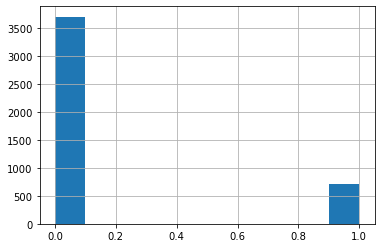

In [31]:
final_dataset["Attrition"].hist()

On peut maintenant utiliser [`StratifiedShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) pour échantillonner le jeu de données en respectant notre contrainte :

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #initialise le split

for train_index, test_index in split.split(final_dataset, final_dataset["Attrition"]): 
    train_set = dataset_without_in_out.loc[train_index]
    test_set = dataset_without_in_out.loc[test_index]

Nous vérifions maintenant si les proportions ont bien été respectées :

<AxesSubplot:>

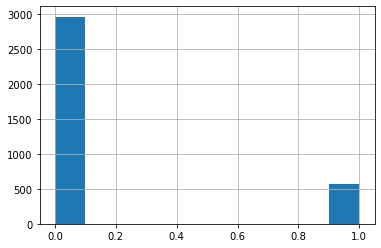

In [33]:
train_set["Attrition"].hist()

<AxesSubplot:>

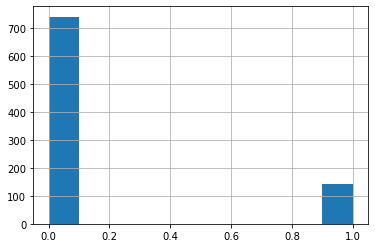

In [34]:
test_set["Attrition"].hist()

Nos histrogrammes semblent avoir les mêmes proportions. Notre stratification a donc bien fonctionnée.

### D. Préparation des données d'entrainement pour les algorithmes de ML

Nous allons commencer par scinder le jeu de données d'entrainement. D'une part nous aurons, les variables-cibles, ou "labels", notées $Y$ et de l'autre, les "features" notées $X$.

In [35]:
train_set_features = train_set.drop("Attrition", axis=1)
train_set_labels = train_set["Attrition"].copy()

#### D.1 Identifications des données numériques et qualitative

In [36]:
train_set_features_num = train_set_features.select_dtypes(include=[np.number]) # recupère les données des colonnes numerique uniquement
train_set_features_cat = train_set_features.select_dtypes(exclude=[np.number]) # recupère les donnée

train_set_features_num = list(train_set_features_num)
train_set_features_cat = list(train_set_features_cat)

#### D.2  Pipeline des données qualitatives

In [37]:
from sklearn.pipeline import Pipeline

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    ('cat_encoder', OneHotEncoder())
])

#### D.2  Pipeline des données numériques

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imput', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#### D.3  Pipeline de préparation des données

In [40]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_set_features_num),
        ("cat", cat_pipeline, train_set_features_cat),
    ])

In [41]:
train_set_features_prepared = full_pipeline.fit_transform(train_set_features)

In [42]:
train_set_features_cat = full_pipeline.named_transformers_['cat']['cat_encoder'].get_feature_names(train_set_features_cat)
train_set_features_cat = list(train_set_features_cat)

train_set_features_prepared_pd = pd.DataFrame(
    train_set_features_prepared,
    columns = train_set_features_num + train_set_features_cat)

train_set_features_prepared_pd.head().style

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.463140,-1.016618,1.055180,-0.969757,-0.259638,-0.679818,-0.341374,-0.939036,-0.160786,-0.615667,0.508815,-0.677208,1.098882,1.797989,-0.432065,-0.661977,0.263919,0.337770,0.154623,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,-0.306868,-1.016618,-1.876060,-0.068228,-0.801808,0.119915,2.102113,-0.939036,-0.676822,0.162575,-1.149782,-0.677208,-1.146292,0.381440,2.314467,0.257856,1.169667,0.337770,-0.460246,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,-1.736884,0.087413,-0.898980,-0.969757,-0.235080,-0.679818,-0.884371,0.234094,-1.321867,-0.615667,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,0.257856,-0.641828,0.337770,-1.284879,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,-0.966876,-0.280597,0.078100,-0.068228,-0.742531,-0.679818,-0.341374,-0.939036,-1.321867,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,0.337770,-1.059293,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.353139,-1.016618,1.055180,-0.068228,2.698904,-0.279952,-0.341374,0.234094,-0.031777,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,-1.094505,-1.219655,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


#### Boites à moustaches

<AxesSubplot:>

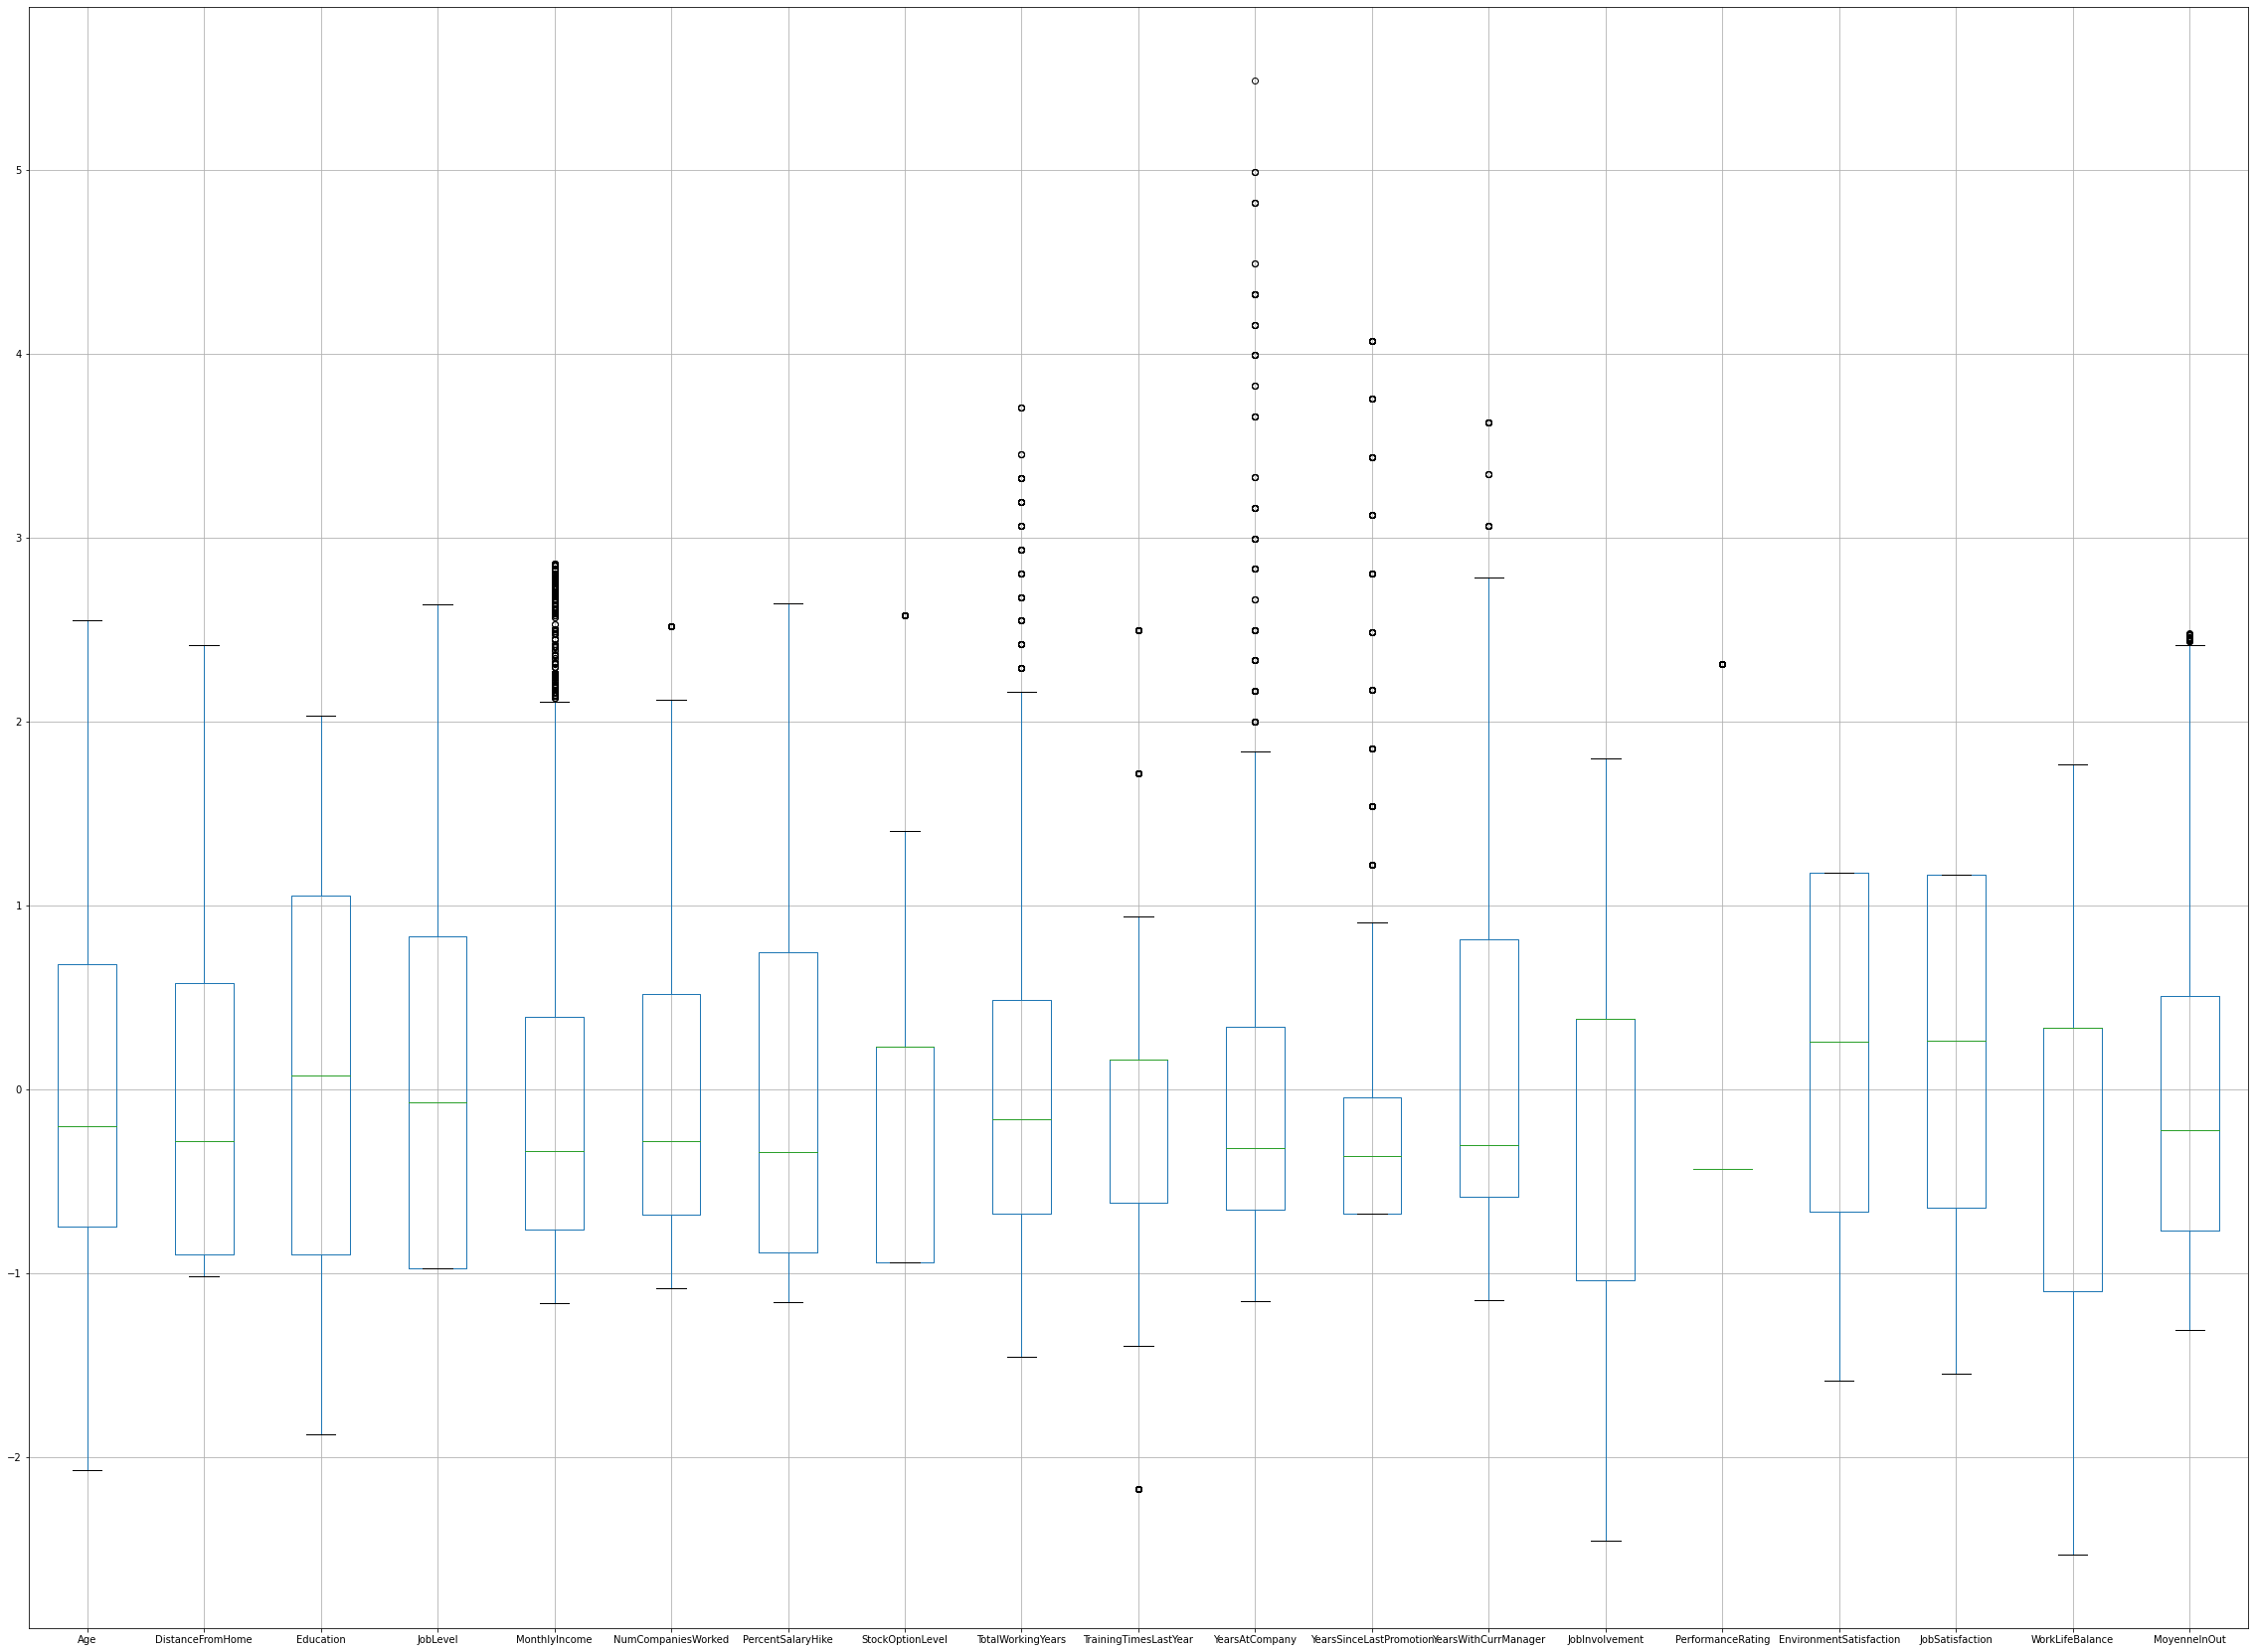

In [43]:
train_set_features_prepared_pd.boxplot(train_set_features_num, figsize=(40,30))

#### Corrélation partie 2

In [87]:
train_set_labels_pd = pd.DataFrame(train_set_labels)
result_train_set = train_set_features_prepared_pd.copy()

result_train_set["Attrition"] = train_set_labels_pd

print(train_set_labels_pd.shape)
print(train_set_features_prepared_pd.shape)
print(result_train_set.shape)

result_train_set.head().style

(3528, 1)
(3528, 40)
(3528, 41)


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
0,0.463140,-1.016618,1.055180,-0.969757,-0.259638,-0.679818,-0.341374,-0.939036,-0.160786,-0.615667,0.508815,-0.677208,1.098882,1.797989,-0.432065,-0.661977,0.263919,0.337770,0.154623,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1,-0.306868,-1.016618,-1.876060,-0.068228,-0.801808,0.119915,2.102113,-0.939036,-0.676822,0.162575,-1.149782,-0.677208,-1.146292,0.381440,2.314467,0.257856,1.169667,0.337770,-0.460246,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
2,-1.736884,0.087413,-0.898980,-0.969757,-0.235080,-0.679818,-0.884371,0.234094,-1.321867,-0.615667,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,0.257856,-0.641828,0.337770,-1.284879,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan
3,-0.966876,-0.280597,0.078100,-0.068228,-0.742531,-0.679818,-0.341374,-0.939036,-1.321867,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,0.337770,-1.059293,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.353139,-1.016618,1.055180,-0.068228,2.698904,-0.279952,-0.341374,0.234094,-0.031777,0.162575,-0.983923,-0.677208,-1.146292,0.381440,-0.432065,-1.581810,-0.641828,-1.094505,-1.219655,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [88]:
corr_matrix = result_train_set.corr()
corr_matrix["Attrition"]

Age                                  0.002785
DistanceFromHome                     0.041128
Education                           -0.004756
JobLevel                             0.018619
MonthlyIncome                        0.001098
NumCompaniesWorked                  -0.021460
PercentSalaryHike                   -0.006596
StockOptionLevel                    -0.018656
TotalWorkingYears                    0.001536
TrainingTimesLastYear               -0.015817
YearsAtCompany                      -0.008651
YearsSinceLastPromotion              0.007931
YearsWithCurrManager                -0.021687
JobInvolvement                      -0.017049
PerformanceRating                   -0.006255
EnvironmentSatisfaction              0.018513
JobSatisfaction                      0.007647
WorkLifeBalance                      0.040453
MoyenneInOut                         0.030960
BusinessTravel_Non-Travel           -0.012623
BusinessTravel_Travel_Frequently     0.000809
BusinessTravel_Travel_Rarely      

In [89]:
corr_matrix = result_train_set.corr(method='spearman') 
corr_matrix_2 = result_train_set.corr(method='kendall') 

corr_matrix.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MoyenneInOut,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Attrition
Age,1.0,0.0034,-0.034,-0.01,-0.023,0.35,-0.034,-0.026,0.66,-0.058,0.24,0.17,0.18,0.02,-0.028,0.015,0.004,0.0021,-0.005,0.00049,-0.015,0.013,-0.0091,0.022,-0.019,-0.046,-0.017,-0.031,0.027,-0.01,0.049,-0.048,0.017,0.022,-0.0043,-0.0037,0.004,0.0022,0.024,-0.032,4.7e-05
DistanceFromHome,0.0034,1.0,-0.016,-0.025,-0.019,-0.041,0.04,0.013,-0.0044,0.015,0.013,0.0052,0.029,-0.032,0.039,0.022,-0.019,0.0088,0.014,-0.031,0.026,-0.0019,-0.032,-0.0033,0.018,0.018,0.0025,0.019,-0.0087,-0.022,-0.0015,-0.028,-0.00039,0.059,-0.052,0.012,-0.013,-0.011,-0.0067,0.022,0.033
Education,-0.034,-0.016,1.0,0.039,-0.0068,-0.0086,-0.034,-0.0091,0.022,0.038,0.012,0.028,0.026,-0.016,-0.035,-0.055,0.005,-0.021,0.0023,-0.0011,0.014,-0.011,0.012,-0.0056,0.00038,-0.026,0.003,-0.0032,-0.024,0.057,0.0045,-0.026,0.054,-0.076,0.036,-0.0059,0.046,-0.0017,0.0059,0.031,-0.0062
JobLevel,-0.01,-0.025,0.039,1.0,0.036,-0.013,0.041,-0.034,-0.031,-0.031,-0.043,-0.041,-0.039,-0.024,0.019,-0.029,-0.019,-0.018,-0.0084,-0.033,-0.0052,0.026,0.021,-0.043,0.035,0.0094,0.014,0.034,-0.046,0.0066,0.0051,0.03,0.026,-0.035,0.029,-0.00095,0.012,0.011,-0.014,-0.035,0.02
MonthlyIncome,-0.023,-0.019,-0.0068,0.036,1.0,-0.041,0.009,0.053,-0.017,0.019,0.019,0.054,0.019,0.022,0.0051,-0.004,-0.0013,0.027,-0.017,0.077,-0.055,-0.0034,-0.021,0.056,-0.049,-0.0069,0.015,-0.047,0.021,0.011,-0.016,-0.023,-0.023,0.017,-0.0094,0.046,0.0088,-0.0094,0.0095,-0.04,0.015
NumCompaniesWorked,0.35,-0.041,-0.0086,-0.013,-0.041,1.0,0.0054,0.04,0.32,-0.018,-0.17,-0.064,-0.15,0.021,-0.0071,0.022,-0.052,-0.012,-0.02,0.0027,-0.035,0.028,-0.042,0.05,-0.033,-0.028,0.0026,0.0035,-0.011,0.0081,0.016,0.02,0.037,-0.0016,-0.004,0.0066,0.019,-0.022,-0.017,-0.0041,-0.015
PercentSalaryHike,-0.034,0.04,-0.034,0.041,0.009,0.0054,1.0,0.014,-0.042,-0.033,-0.048,-0.034,-0.049,-0.022,0.63,-0.0017,0.025,-0.038,0.029,0.035,-0.0074,-0.017,-0.031,0.029,-0.016,-0.011,-0.013,-0.022,0.038,0.026,-0.031,0.025,-0.033,0.034,-0.0057,-0.01,-0.022,0.003,-0.044,0.054,-0.0017
StockOptionLevel,-0.026,0.013,-0.0091,-0.034,0.053,0.04,0.014,1.0,0.0084,-0.059,0.0021,0.0091,0.0035,0.0047,-0.036,0.0006,0.045,0.0021,-0.014,0.0079,-0.017,0.0093,0.014,-0.028,0.023,0.003,-0.046,-0.0097,0.068,-0.00063,-0.022,0.01,-0.025,0.0097,-0.081,0.029,-0.011,0.019,0.026,-0.026,-0.014
TotalWorkingYears,0.66,-0.0044,0.022,-0.031,-0.017,0.32,-0.042,0.0084,1.0,-0.053,0.58,0.32,0.48,-0.0095,-0.013,-0.0073,-0.0079,0.0077,-0.014,-0.028,-0.0081,0.025,-0.048,0.062,-0.042,-0.062,-0.0024,-0.013,0.015,-0.043,0.057,-0.017,0.034,0.018,-0.0048,-0.0069,0.018,-0.006,0.022,-0.068,-0.00064
TrainingTimesLastYear,-0.058,0.015,0.038,-0.031,0.019,-0.018,-0.033,-0.059,-0.053,1.0,-0.024,0.003,-0.022,-0.014,-0.028,0.036,-0.018,-0.017,-0.035,0.055,-0.016,-0.023,-0.027,0.004,0.008,-0.027,0.033,-0.0017,-0.0055,-0.054,0.012,-0.036,-0.033,-0.031,-0.014,-0.011,0.024,-0.017,0.07,0.032,-0.022


In [47]:
# cor = correlation_cross_val(df[["X1e", "X2e"]], DecisionTreeRegressor)

No handles with labels found to put in legend.


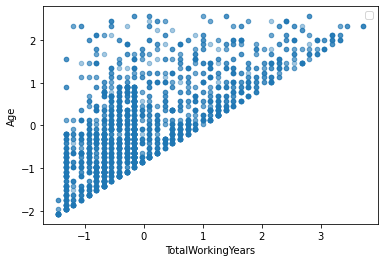

In [90]:
result_train_set.plot(kind="scatter", x="TotalWorkingYears", y="Age", alpha=0.4,
    sharex=False)
plt.legend()

No handles with labels found to put in legend.


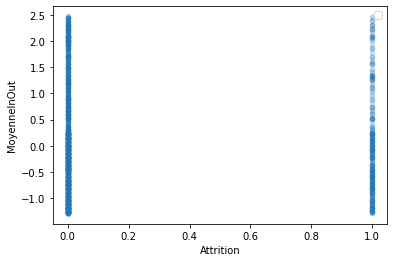

In [91]:
result_train_set.plot(kind="scatter", x="Attrition", y="MoyenneInOut", alpha=0.1,
    sharex=False)
plt.legend()

Nous étudions à travers ce graphique l'impacte de `MoyenneInOut` sur `Attrition`. On souhaite donc savoir comment le temps de travail moyen d'un salarié sur une année au sein de l'entreprise, impacte sa prise de décision concernant son choix de rester au sein de l'entreprise ou bien de partir.

Le label attrition étant binaire (Oui ou Non), le graphique est donc partagé en deux catégories

* 0 - le salarié souhaite continuer à travailler pour l'entreprise pour l'année 2016
* 1 - le salarié à décidé de partir de l'entreprise durant l'année 2016

Nous remarquons que le nombre d'employés ayant un temps de travail moyen sur une année important on beaucoup plus tendance à rester au sein de l'entreprise (concentration de points beaucoup plus important à des valeurs élevé de MoyenneInOut). Nous pouvons en conclure que lorsque le salarié effectue peu d'heures de travail celui-ci a beaucoup plus tendance à quitter l'entreprise.

# 2. Choix d'un modèle de machine learning

Nous allons commencer par scinder le jeu de données de test. D'une part nous aurons, les variables-cibles, ou "labels", notées $Y$ et de l'autre, les "features" notées $X$.

In [50]:
test_set_features = test_set.drop("Attrition", axis=1)
test_set_labels = test_set["Attrition"].copy()

In [51]:
test_set_features_prepared = full_pipeline.transform(test_set_features)

#### Choix du premier modèle : regression logistique

In [52]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=seed).fit(train_set_features_prepared, train_set_labels)

In [53]:
logistic_regression.predict(test_set_features_prepared)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [54]:
logistic_regression.predict_proba(test_set_features_prepared)

array([[0.99588501, 0.00411499],
       [0.78890418, 0.21109582],
       [0.97506625, 0.02493375],
       ...,
       [0.70900427, 0.29099573],
       [0.68998564, 0.31001436],
       [0.64744801, 0.35255199]])

In [55]:
logistic_regression.score(test_set_features_prepared, test_set_labels)

0.8582766439909297

#### Comparaison modèle de regression logistique avec un classificateur absurde

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic_regression, train_set_features_prepared, train_set_labels, cv=3, scoring="accuracy")

array([0.84268707, 0.85629252, 0.86139456])

In [57]:
from sklearn.base import BaseEstimator
class NeverYesClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [58]:
NeverYesClassifier = NeverYesClassifier()
cross_val_score(NeverYesClassifier, train_set_features_prepared, train_set_labels, cv=3, scoring="accuracy")

array([0.84013605, 0.84693878, 0.82908163])

#### Matrice de confusion

In [59]:
from sklearn.model_selection import cross_val_predict
train_set_labels_pred = cross_val_predict(logistic_regression, train_set_features_prepared, train_set_labels, cv=3)

In [60]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_me = confusion_matrix(train_set_labels, train_set_labels_pred)
confuse_me_pd = pd.DataFrame(data=confusion_me)
confuse_me_pd.head()

,0,1
0,2892,67
1,450,119


Ci-dessous, on peut la comparer à la matrice de confusion qui serait produite par un classifieur parfait :

In [61]:
y_train_perfect_predictions = train_set_labels

perfect_confusion_me = confusion_matrix(train_set_labels, y_train_perfect_predictions)
confuse_me_pd = pd.DataFrame(data=perfect_confusion_me)
confuse_me_pd.head()

,0,1
0,2959,0
1,0,569


#### Précision

In [62]:
from sklearn.metrics import precision_score, recall_score
precision_score(train_set_labels, train_set_labels_pred)

0.6397849462365591

#### Recall

In [63]:
recall_score(train_set_labels, train_set_labels_pred)

0.20913884007029876

#### Moyenne harmonique

In [64]:
from sklearn.metrics import f1_score
f1_score(train_set_labels, train_set_labels_pred)

0.3152317880794701

In [65]:
y_scores = logistic_regression.decision_function(test_set_features_prepared)
y_scores

array([-5.48899629e+00, -1.31833271e+00, -3.66628301e+00, -2.55979098e+00,
       -3.53500668e+00, -2.25428224e+00, -2.68171719e+00,  7.80775826e-02,
       -2.21101375e+00, -4.09139344e-01,  7.88919721e-01, -2.19705432e+00,
       -6.38581500e+00, -1.82772532e+00, -3.67594314e+00, -5.53941223e-01,
       -4.41115282e+00, -5.08475736e+00, -1.15927543e+00,  5.24425915e-02,
       -1.27078717e-01, -1.15567713e+00, -1.48298557e+00, -3.00987715e+00,
       -1.84548976e+00, -2.74377521e+00, -1.27531425e+00, -3.49762932e+00,
       -2.79980962e+00, -2.95247896e+00, -3.53984549e+00, -9.19777929e-01,
        5.83080194e-01, -8.88278983e-01, -3.76913497e-01, -2.80761661e+00,
       -4.26121595e+00,  6.97443577e-02, -2.01434974e+00,  1.69006031e+00,
       -8.61415940e-01, -1.56746779e+00, -2.12817432e+00, -3.00840823e+00,
       -1.91781584e+00, -3.84769420e+00, -3.35369826e+00, -2.88992378e+00,
       -1.06113559e+00, -1.55164180e+00, -4.70691121e+00, -1.72860942e+00,
       -1.36877345e+00, -

In [66]:
# threshold = 0 # seuil par défaut
# y_some_digit_pred = (y_scores > threshold)
# y_some_digit_pred

In [67]:
# threshold = 200000
# y_some_digit_pred = (y_scores > threshold)
# y_some_digit_pred

In [68]:
y_probas_logistique_reg = cross_val_predict(logistic_regression, train_set_features_prepared, train_set_labels, cv=3,method="predict_proba")
y_probas_logistique_reg

y_probas_logistique_reg_pd = pd.DataFrame(data=y_probas_logistique_reg)
print(y_probas_logistique_reg_pd.head())

y_scores_logistique_reg = np.delete(y_probas_logistique_reg, 0, axis=1)

          0         1
0  0.945930  0.054070
1  0.926799  0.073201
2  0.519195  0.480805
3  0.623190  0.376810
4  0.889395  0.110605


In [69]:
y_score_logistique_reg = cross_val_predict(logistic_regression, train_set_features_prepared, train_set_labels, cv=3,method="decision_function")
y_score_logistique_reg
print(y_score_logistique_reg.shape)

(3528,)


In [70]:
# threshold = 0 # seuil par défaut du classifier
# y_train_pred_threshold = (y_scores > threshold)
# y_train_pred_threshold

# print(y_train_pred_threshold.shape)
# print(train_set_labels_pred.shape)

# comparison = y_train_pred_threshold == train_set_labels_pred
# equal_arrays = comparison.all()

# print(equal_arrays)

In [71]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(train_set_labels, y_scores_logistique_reg)

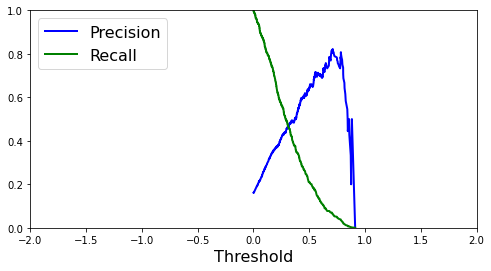

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-2, 2])
plt.show()

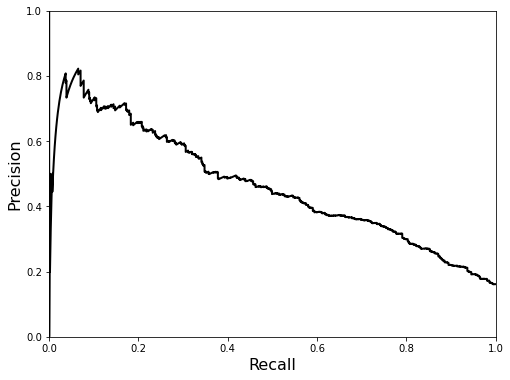

In [73]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

#### Courbe ROC

In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_set_labels, y_scores_logistique_reg)

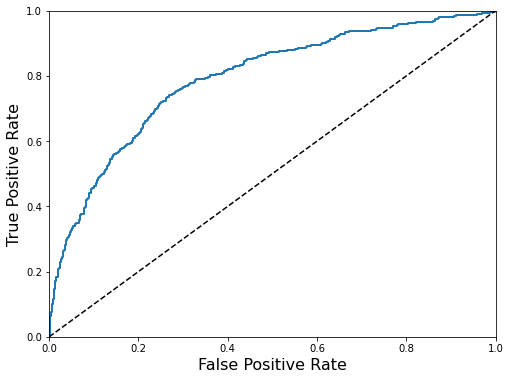

In [75]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score
roc_au_score = roc_auc_score(train_set_labels, y_scores_logistique_reg)
roc_au_score

0.7907031718191974

#### Comparaison de deux modèles

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, train_set_features_prepared, train_set_labels, cv=3,method="predict_proba")

In [78]:
y_probas_forest
y_probas_forest_pd = pd.DataFrame(data=y_probas_forest)
print(y_probas_forest_pd.head())

     0    1
0  0.9  0.1
1  0.9  0.1
2  0.2  0.8
3  0.4  0.6
4  0.9  0.1


In [79]:
y_scores_forest = np.delete(y_probas_forest, 0, axis=1)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_set_labels, y_scores_forest)

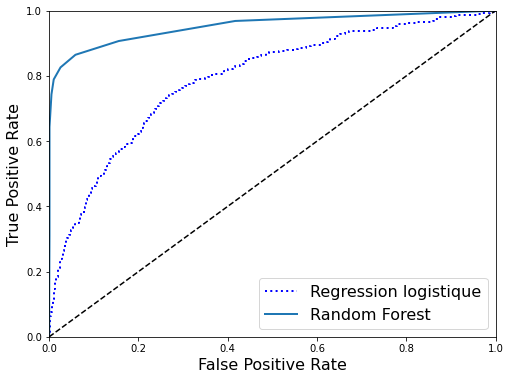

In [80]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="Regression logistique")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

#### Randomized Search

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform

space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

logistique_reg = LogisticRegression(random_state=42)
random_search = RandomizedSearchCV(logistique_reg, space, cv=5, scoring='accuracy', n_iter=10)
result = random_search.fit(train_set_features_prepared, train_set_labels)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn

Best Score: 0.8551632411146605
Best Hyperparameters: {'C': 2.032874902000602e-05, 'penalty': 'none', 'solver': 'newton-cg'}


D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.85516324 0.85516324 0.83871898 0.85516324 0.83871898        nan
 0.85487995 0.85516324 0.85402889 0.85516324]
  category=UserWarning
D:\Logiciel\anaconda3\envs\Bloc_IA_Env\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [82]:
feature_importances = random_search.best_estimator_.coef_
feature_importances

array([[-0.42989118, -0.02914813, -0.02067502, -0.09623523, -0.05068877,
         0.32964068,  0.0613195 , -0.04617774, -0.4962046 , -0.18989861,
        -0.02868201,  0.49087046, -0.53365402, -0.03082324, -0.05385942,
        -0.38412952, -0.41632925, -0.22018349,  0.62158637, -1.01194042,
         0.39847255, -0.47570326, -0.01204101, -0.51600578, -0.56112433,
         0.50141704, -0.05898205, -0.46352241, -0.2473147 , -0.43987095,
        -0.38089804, -0.18370218, -0.17672983, -0.04188063, -0.29749256,
        -0.75417272,  0.35271312,  0.07308944,  0.26395935, -0.3249551 ]])

In [83]:
print(len(train_set_features_num))
print(len(train_set_features_cat))
print(len(feature_importances[0]))
sorted(zip(feature_importances[0], train_set_features_num + train_set_features_cat), reverse=True)

19
21
40


[(0.6215863696451986, 'MoyenneInOut'),
 (0.5014170357008353, 'EducationField_Human Resources'),
 (0.4908704614502271, 'YearsSinceLastPromotion'),
 (0.3984725547649223, 'BusinessTravel_Travel_Frequently'),
 (0.3527131185727886, 'JobRole_Research Director'),
 (0.3296406831622667, 'NumCompaniesWorked'),
 (0.2639593466548439, 'JobRole_Sales Executive'),
 (0.07308944272917331, 'JobRole_Research Scientist'),
 (0.06131950334865295, 'PercentSalaryHike'),
 (-0.012041011666917062, 'Department_Human Resources'),
 (-0.020675018853067214, 'Education'),
 (-0.02868200541335477, 'YearsAtCompany'),
 (-0.02914812963230451, 'DistanceFromHome'),
 (-0.030823241256194837, 'JobInvolvement'),
 (-0.04188063286966442, 'JobRole_Laboratory Technician'),
 (-0.04617773553483805, 'StockOptionLevel'),
 (-0.0506887734966349, 'MonthlyIncome'),
 (-0.05385941972748559, 'PerformanceRating'),
 (-0.05898205354260436, 'EducationField_Life Sciences'),
 (-0.09623523212481443, 'JobLevel'),
 (-0.17672983442580578, 'JobRole_Human

#### Grid Search

In [84]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(train_set_features_prepared, train_set_labels)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.854308 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.854308 (0.007424) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.854308 (0.007424) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.854308 (0.007424) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.854308 (0.007424) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.854308 (0.007424) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.854308 (0.007424) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.853458 (0.007896) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.853458 (0.007896) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.854308 (0.007227) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.853741 (0.007348) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.853741 (0.007348) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.851757 (0.007227) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.846655 (0.002891) wit